1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)
print(m.mean())
print("Mean for each column",m.mean(axis=0))
print("Mean for each row",m.mean(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
5.5
Mean for each column [4. 5. 6. 7.]
Mean for each row [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [2]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

#using the function outer in numpy
print(np.outer(u,v))

#using a nested for loop
m = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
for i in range (0,len(u)):
    for j in range (0,len(v)):
        m[i][j]=u[i]*v[j]
print(m)

#using numpy broadcasting operations
print(u[:,None] * v[None,:])

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [3]:
import numpy.random as npr
npr.seed(2121706) #I fix the random seed with my ID number
#definition of the matrix
mat = npr.uniform(low=0, high=3, size=(10,6))
print(mat)

#definition of the mask
mask = (mat<0.3)
mat[mask] = 0

print("Masked matrix:")
print(mat)

[[1.77523108 1.15450526 2.73645661 2.751629   2.23461531 2.773643  ]
 [1.68012528 1.81188084 2.73601328 1.75505634 2.93141837 0.22833031]
 [2.75183774 2.27944177 1.31419797 2.77374648 0.7315072  2.83595821]
 [1.96541816 2.1564735  2.47271991 2.74230711 2.0852232  1.86189971]
 [0.38022169 1.38263481 0.31744046 2.3720162  2.7197348  2.77277312]
 [0.84853178 2.63630138 2.96915817 0.6239072  2.22569223 0.18457455]
 [0.19088435 0.05502081 0.50081965 2.05227698 2.88411343 1.74276098]
 [0.37143542 1.95653271 0.79492093 2.22781363 2.70909191 1.6883282 ]
 [2.27211635 2.67425452 2.21650077 2.05284016 0.48591555 1.78221157]
 [1.29277686 0.66926436 1.23638697 0.39514392 0.646782   2.68079172]]
Masked matrix:
[[1.77523108 1.15450526 2.73645661 2.751629   2.23461531 2.773643  ]
 [1.68012528 1.81188084 2.73601328 1.75505634 2.93141837 0.        ]
 [2.75183774 2.27944177 1.31419797 2.77374648 0.7315072  2.83595821]
 [1.96541816 2.1564735  2.47271991 2.74230711 2.0852232  1.86189971]
 [0.38022169 1.382

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

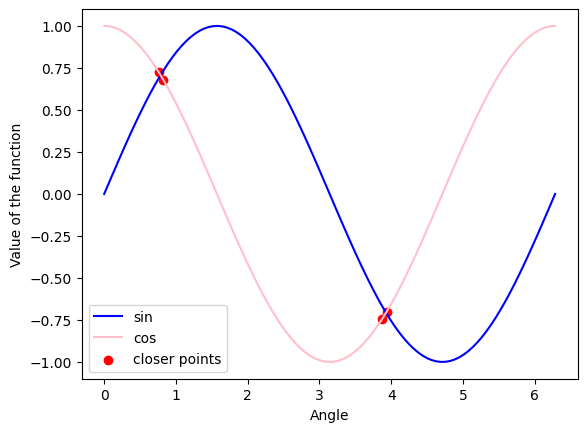

In [4]:
import math
import matplotlib.pyplot  as plt

#creation of the array
a = np.linspace(0, 2*math.pi, 100, endpoint=True)
print(a, '\n')

#print every 10th element using the slice notation
b = a[10::10]
print("10th elements:\n", b, '\n')

#reverse the array using the slice notation
c = a[::-1]
print("reversed array: ", c, '\n')

#extract elements
l = [] #temporary list to store values
val1 = []
val2 = []
for i in range(0,len(a)):
    val1.append(np.sin(a[i]))
    val2.append(np.cos(a[i]))
    if (abs(math.sin(a[i])-math.cos(a[i]))<0.1):
        l.append(a[i])
#closer points
d = np.array(l)
sin_val = np.array(val1)
cos_val = np.array(val2)
print("elements where the absolute difference between the sin and cos functions evaluated for that element is < 0.1\n",d,'\n' )

#final plot, using values found in which the two functions are very close (difference of is <0.1)
plt.plot(a,sin_val,color='blue', label='sin')
plt.plot(a,cos_val,color='pink', label='cos')
plt.scatter(d, np.cos(d), marker = 'o', color='red', label='closer points')
plt.legend()
plt.xlabel('Angle')
plt.ylabel('Value of the function')
plt.show()

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
#10*10 multiplication table
mult_table = matrix_mul = np.outer(np.arange(1,11), np.arange(1,11))
print(mult_table)

#trace of the matrix
trace = mult_table.trace()
print("Trace of the matrix:", trace)

#temp list to append elements
l = []
for i in range(0,10):
        l.append(mult_table[i][9-i])

print("Anti-diagonal matrix:",np.array(l))

l = []
for i in range(0,9):
        l.append(mult_table[i][i+1])
print("Diagonal offset by 1 upwards:",np.array(l))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace of the matrix: 385
Anti-diagonal matrix: [10 18 24 28 30 30 28 24 18 10]
Diagonal offset by 1 upwards: [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [6]:
pos = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances = np.abs(pos - pos[:, np.newaxis])
print("original array:", '\n', distances, '\n')
print("Distances in km: \n",distances*1.60934)

original array: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

Distances in km: 
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.30226 1300.

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [7]:
import timeit

#mask array
m = [True for i in range(1000)]
#list that contains the prime numbers
p = []

def primes1():
    for i in range(2,100):
        for j in range(2,9):
            if ((i%j)==0 and i!=j):
                m[i]=False
    for i in range(2,100):
        if m[i]:
            p.append(i)

print("Time in seconds for the 1st solution (N=99):",timeit.timeit('primes1()', globals=globals(), number=1))
print(p)
#time requested for the function execution grows (as expected) when N also grows 



#mask array
m = [True for i in range(100)]
m[1] = False
#list that contains the prime numbers
p = []
def primes2():
    for i in range(2,math.ceil(math.sqrt(100))+1):
        if m[i]:
            for j in range(i*i, 100, i):
                m[j]=False
    
    for i in range(2,100):
       if m[i]:
            p.append(i)

print("Time in seconds for the 2nd solution (sieve of Eratosthenes, N=99):",timeit.timeit('primes2()', globals=globals(), number=1))
print(p)
#it can be seen that the performances are better with the optimization rather than the first algorithm, in terms of time for computation

Time in seconds for the 1st solution (N=99): 7.379700036835857e-05
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Time in seconds for the 2nd solution (sieve of Eratosthenes, N=99): 1.353599873255007e-05
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

[  1.      1.96    2.8     3.696   4.648   5.364   6.36    7.556   8.304
   9.156  10.208  11.052  11.696  12.764  13.976  14.924  16.048  17.044
  17.984  18.788  19.544  20.36   21.368  22.48   23.24   23.724  24.144
  24.992  25.408  26.268  27.064  28.396  28.96   30.024  31.992  32.432
  33.384  34.524  35.064  35.144  36.328  37.372  38.36   39.308  40.224
  41.252  42.712  44.096  45.184  46.056  47.08   47.26   48.184  49.076
  50.44   52.08   52.72   54.456  55.328  56.28   57.76   59.16   60.264
  61.388  62.184  62.668  64.04   64.684  65.24   66.4    67.376  67.532
  68.616  69.012  69.408  69.796  70.664  71.084  71.984  72.644  74.272
  75.368  77.16   77.324  78.016  78.84   79.272  79.924  80.584  81.336
  81.68   82.536  83.368  84.836  86.12   87.472  88.656  90.932  91.744
  92.312  93.84   95.408  97.448  98.708  99.264  99.128 100.16  101.44
 101.752 102.62  103.632 104.06  105.312 106.5   107.888 108.716 109.288
 110.244 111.664 113.456 114.76  116.196 116.776 118

Text(0, 0.5, 'average distance')

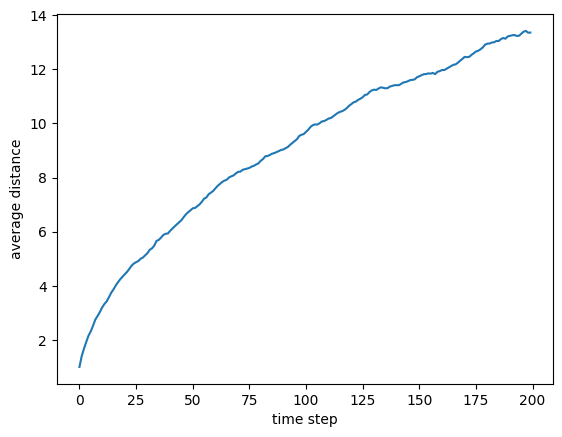

In [8]:
w = 1000 #walkers
s = 200 #steps

time = np.arange(s)
steps = 2 * np.random.randint(0, 1 + 1, (w, s))-1 #create a 2D array of size w*s with values -1 or 1
distance = np.cumsum(steps, axis=1) #calculate the walking distances for each walker 
squared_distance = distance*distance #take the square of the previously-obtained array
mean_squared_distance = np.mean(squared_distance, axis=0) #compute the mean of the squared distances at each step
print(mean_squared_distance)

#plot of the average distances
plt.plot(time, np.sqrt(mean_squared_distance))
plt.xlabel('time step')
plt.ylabel('average distance')